<a id='section1'></a>
## Importing data & libraries

In [1]:
agb_data_path = "preprocess/agb_avitabile_2010-2016_v3.nc" #Baseline data

In [2]:
slopes_data_path  = "raw/slope_O320.nc"

In [3]:
import xarray as xr
import numpy
import os
import matplotlib.pyplot as plt

In [4]:
"""Load AGB data into an xarray dataset"""
agb_data = xr.open_dataset(agb_data_path)

In [5]:
"""Load Slope data into an xarray dataset"""
slopes_data = xr.open_dataset(slopes_data_path)

## Before Pre-processing

In [6]:
print(slopes_data)

<xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 1200)
Coordinates:
  * latitude   (latitude) float64 90.0 89.7 89.4 89.1 ... -89.4 -89.7 -90.0
  * longitude  (longitude) float64 0.0 0.3 0.6 0.9 ... 358.8 359.1 359.4 359.7
Data variables:
    slor       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-20T07:26:33 GRIB to CDM+CF via cfgrib-0....


In [7]:
print(slopes_data.to_dataframe().describe())

                slor
count  721200.000000
mean        0.003451
std         0.009743
min         0.000100
25%         0.000100
50%         0.000100
75%         0.001404
max         0.153056


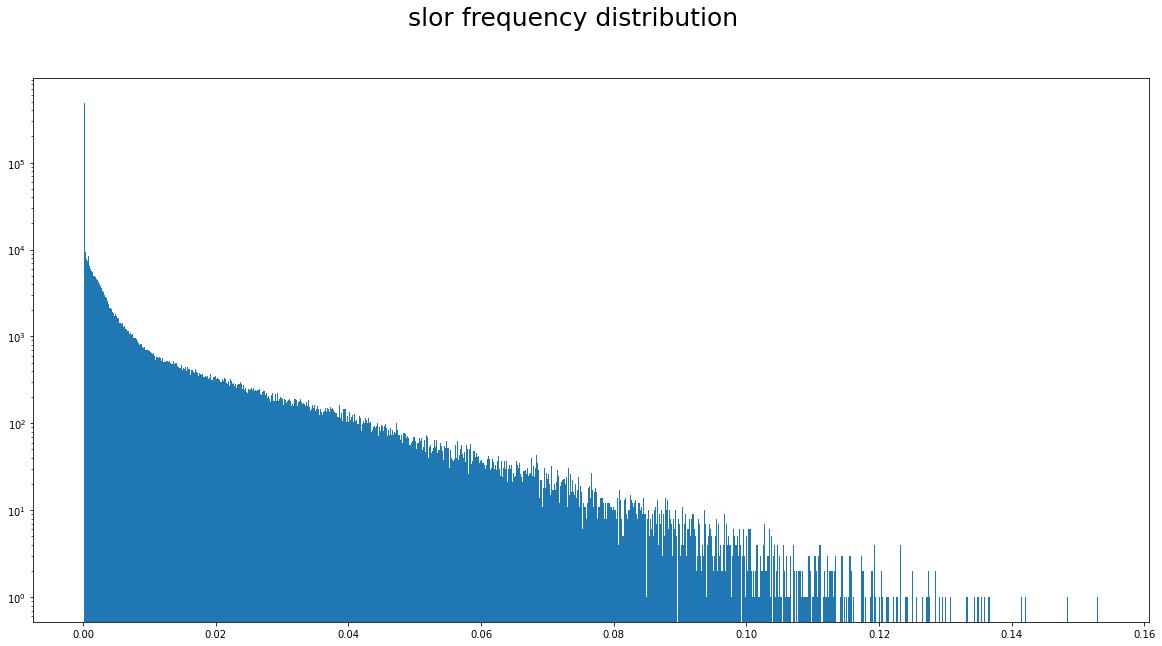

In [8]:
var_list =['slor']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(slopes_data[list(slopes_data.data_vars)[i]].values.flatten(), bins=1000, cumulative=False, log=True)

<a id='section2'></a>
## Pre-processing of Slopes

### Interpolating dataset to match resolution of AGB dataset

In [9]:
slopes_data = slopes_data.assign_coords({'latitude':slopes_data.latitude.values,'longitude':xr.where(slopes_data.longitude > 180, slopes_data.longitude - 360, slopes_data.longitude) })
slopes_data = slopes_data.interp({'latitude':agb_data.latitude.values,'longitude':agb_data.longitude.values})

### Plots

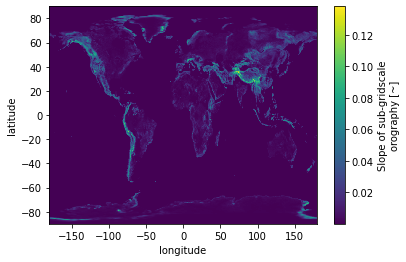

In [10]:
slopes_data.slor.plot()

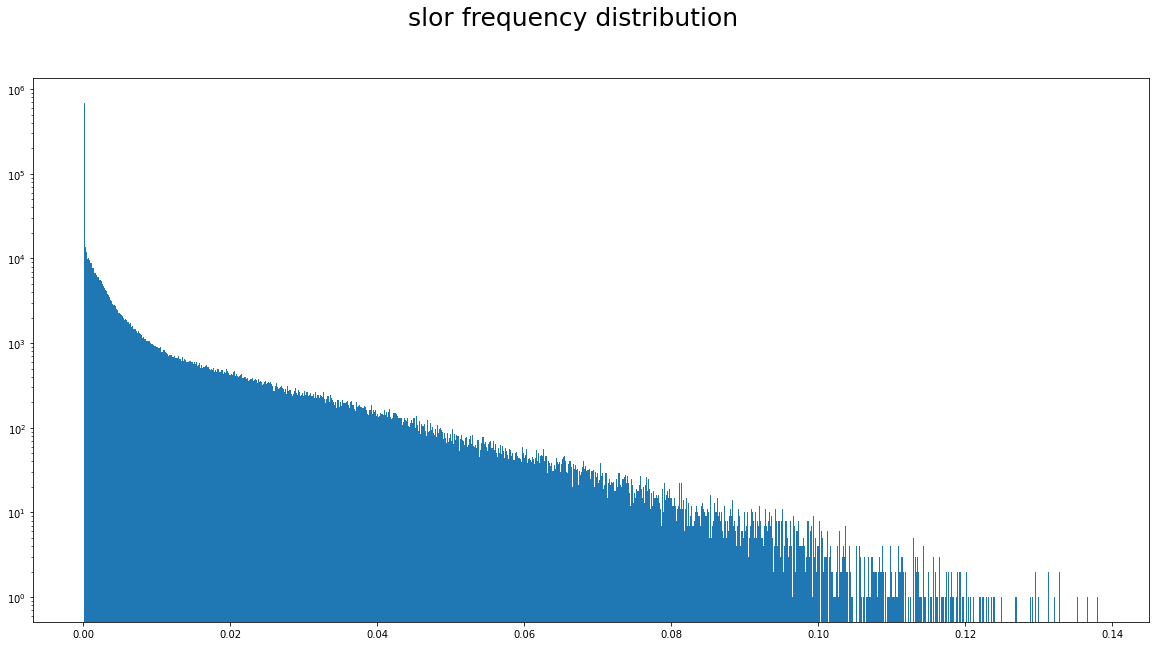

In [11]:
var_list =['slor']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(slopes_data[list(slopes_data.data_vars)[i]].values.flatten(), bins=1000, cumulative=False, log=True)

### Dataset after pre-processing

In [12]:
print(slopes_data)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    slor       (latitude, longitude) float64 0.001379 0.001378 ... 0.0001 nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-20T07:26:33 GRIB to CDM+CF via cfgrib-0....


In [13]:
#Pandas describe method
print(slopes_data.to_dataframe().describe())

               slor
count  1.036080e+06
mean   3.458163e-03
std    9.565404e-03
min    9.999999e-05
25%    9.999999e-05
50%    9.999999e-05
75%    1.520891e-03
max    1.380987e-01


### Saving pre-processed file

In [14]:
slopes_data.to_netcdf("preprocess/slopes_2010-2016_v3.nc")

In [15]:
#File size
print(os.stat("preprocess/slopes_2010-2016_v3.nc").st_size/1e9,"GB")

0.008315675 GB
